In [10]:
!mkdir -p build
!cd build && cmake .. &&  make

-- Traces are activated
-- Configuring done
-- Generating done
-- Build files have been written to: /home/cgomes/ot5/TP_AEVOL/build
Consolidate compiler generated dependencies of target micro_aevol
[  8%] Building CXX object CMakeFiles/micro_aevol.dir/Organism.cpp.o
[ 16%] Linking CXX static library libmicro_aevol.a
[ 83%] Built target micro_aevol
Consolidate compiler generated dependencies of target micro_aevol_cpu
[ 91%] Linking CXX executable micro_aevol_cpu
[100%] Built target micro_aevol_cpu


In [5]:
!mkdir -p build
!cd build && cmake .. -DUSE_OMP=True -DCMAKE_CXX_FLAGS=-pg -DCMAKE_EXE_LINKER_FLAGS=-pg -DCMAKE_SHARED_LINKER_FLAGS=-pg && make

-- Traces are activated
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Configuring done
-- Generating done
-- Build files have been written to: /home/cgomes/ot5/TP_AEVOL/build
Consolidate compiler generated dependencies of target micro_aevol
[  8%] Building CXX object CMakeFiles/micro_aevol.dir/Abstract_ExpManager.cpp.o
[ 16%] Building CXX object CMakeFiles/micro_aevol.dir/ExpManager.cpp.o
[ 25%] Building CXX object CMakeFiles/micro_aevol.dir/AeTime.cpp.o
[ 33%] Building CXX object CMakeFiles/micro_aevol.dir/DnaMutator.cpp.o
[ 41%] Building CXX object CMakeFiles/micro_aevol.dir/MutationEvent.cpp.o
[ 50%] Building CXX object CMakeFiles/micro_aevol.dir/Organism.cpp.o
[ 58%] Building CXX object CMakeFiles/micro_aevol.dir/Stats.cpp.o
[ 66%] Building CXX object CMakeFiles/micro_aevol.dir/Threefry.cpp.o
[ 75%] Building CXX object CMakeFiles/micro_aevol.dir/Dna.cpp.o
[ 83%] Linking CXX st

In [3]:
import os
import subprocess
import glob
import subprocess

nb_steps = [1000, 2000, 5000, 10000]
for nb_step in nb_steps:
    print(os.getcwd())

    subfolders = [ f.path for f in os.scandir("simulations") if f.is_dir() ]
    folder_name = "simulation_" + str(len(subfolders))

    print(folder_name)

    os.mkdir("simulations/" + folder_name)
    os.chdir("./simulations/" + folder_name)

    with open('parameters.txt', 'w') as f:
        f.write("nb_steps : " + str(nb_step))

    args = ("../../build/micro_aevol_cpu", "-n", str(nb_step))
    popen = subprocess.Popen(args)
    
    popen.wait()

    # print(os.getcwd())

    os.chdir("../../")


/home/cgomes/Documents/micro-aevol2
simulation_3
/home/cgomes/Documents/micro-aevol2
simulation_4
/home/cgomes/Documents/micro-aevol2
simulation_5
/home/cgomes/Documents/micro-aevol2
simulation_6


     Generation       fitness  metabolic_error  amount_of_dna  nb_coding_rnas  \
0             1  1.142680e-66         0.151837           5000               1   
1             2  1.142680e-66         0.151837           5000               1   
2             3  1.142680e-66         0.151837           5000               1   
3             4  2.905020e-58         0.132483           5000               1   
4             5  2.905020e-58         0.132483           5000               1   
5             6  2.905020e-58         0.132483           5000               1   
6             7  2.905020e-58         0.132483           5000               1   
7             8  2.905020e-58         0.132483           5000               1   
8             9  2.905020e-58         0.132483           5000               1   
9            10  2.905020e-58         0.132483           5000               1   
10           11  2.905020e-58         0.132483           5000               1   
11           12  2.905020e-5

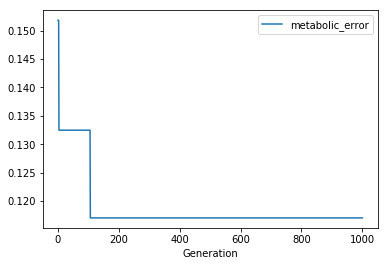

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('build/simulation_example_1/stats/stats_simd_best.csv',header=0)
print(df)


df.plot(x='Generation', y = 'metabolic_error')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('build/simulation_example_1/stats/stats_simd_best.csv',header=0)
print(df)


df.plot(x='Generation', y = 'metabolic_error')

/tmp/ipykernel_453/706798827.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trace'].iloc[:len(df0)] = 0
/tmp/ipykernel_453/706798827.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trace'].iloc[len(df0):len(df0)+len(df1)] = 1
/tmp/ipykernel_453/706798827.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trace'].iloc[len(df0)+len(df1):] = 2


TypeError: Got both 'c' and 'color', which are aliases of one another

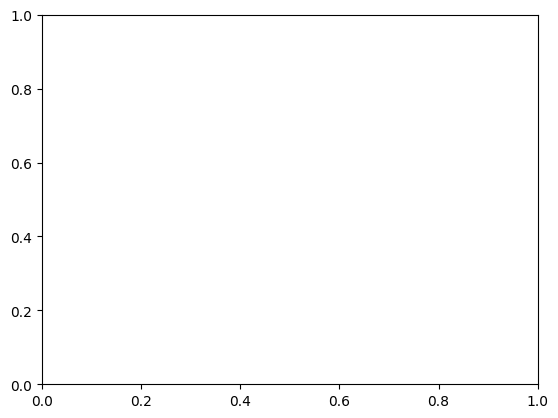

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

csv0_path = 'build/trace_1.csv'
csv1_path = 'build/trace_10.csv'

df0 = pd.read_csv(csv0_path,header=0)
df1 = pd.read_csv(csv1_path,header=0)


#remove 1st element of each dataframe
df0 = df0.iloc[1:]
df1 = df1.iloc[1:]

#concatenate and add a column to identify the dataframe with a name
df = pd.concat([df0, df1])
df['trace'] = np.where(df['Generation'] < 1000, 'trace_1', 'trace_10')


#group by trace, do the mean on Duration and plot
df.groupby('trace').mean().plot(y='Duration', kind='bar')



